Created: 12/4/2019  
DATA 512 Human Centered Data Science  
Peter Meleney  

# Chapter 3: Linear Regression

## Overview

In this lab we will:
1. Review the Boston data set.
1. Regress the target on a single predictive variable.  
1. Perform multiple linear regression.
1. Allow for the use of interaction terms.
1. Introduce non-linear transformations of predictor variables.

## Imports

For all notebooks we will import numpy as np and pandas as pd - these are standard import styles and ubiquitous in the data science world.  Pandas is a tool that is widely used by data scientists to structure and view their data, as well as to produce some basic statistics about their data.  We will see examples of this in this chapter.  Numpy is the "fundamental package for scientific computing in python."  It allows for fast matrix calculation in python and is also ubiquitous in the python data science community.

In [1]:
#Imports for chapter 3: Linear Regression
import numpy as np 
import math
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression #The version of linear regression we will be implementing

In [49]:
#allows for matplotlib charts to plot inline in a jupyter notebook.
%matplotlib inline 

#Increases number of characters displayed per column in a dataframe to 100
pd.options.display.max_colwidth =100 

## The Boston Dataset

The "Boston" dataset records one target variable: the median house value (medv), and 13 predictive variables for 506 Boston neighborhoods (see table below for details).  The objective of this section will be to predict the house price from the various predictive features using linear regression.

The data are from a paper published in 1978, so house prices are considerably lower than they are now.  The paper "investigates the methodological problems associated with the use of housing market data to measure the willingness to pay for clean air" [1], hence the need for the NoX column.  The other columns are meant to estimate a hedonic price for the house in question, to isolate the effect of the NOX in the air.

These data are sourced from: [2]

In [93]:
data_description = pd.DataFrame([["CRIM", "Per capita crime rate by town."],
["ZN","Proportion of residential land zoned for lots over 25,000 sq.ft.."],
["INDUS", "Proportion of non-retail business acres per town."],
["CHAS", "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)."],  
["NOX", "Nitric oxides concentration (parts per 10 million)."],
["RM", "Average number of rooms per dwelling."],
["AGE", "Proportion of owner-occupied units built prior to 1940."],  
["DIS", "Weighted distances to five Boston employment centres."], 
["RAD", "Index of accessibility to radial highways."],
["TAX", "Full-value property-tax rate per $10,000."],
["PTRATIO", "Pupil-teacher ratio by town."],
["B", "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town."], 
["LSTAT", "% lower status of the population."],
["MEDV", "Median value of owner-occupied homes in $1000's."]])

data_description.columns = ['Name', "Description"]
data_description.index = data_description.iloc[:,0]
data_description.drop('Name', axis = 1, inplace=True)
data_description

,Description
Name,
CRIM,Per capita crime rate by town.
ZN,"Proportion of residential land zoned for lots over 25,000 sq.ft.."
INDUS,Proportion of non-retail business acres per town.
CHAS,Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
NOX,Nitric oxides concentration (parts per 10 million).
RM,Average number of rooms per dwelling.
AGE,Proportion of owner-occupied units built prior to 1940.
DIS,Weighted distances to five Boston employment centres.
RAD,Index of accessibility to radial highways.


## Import and Review Data

In [94]:
#pd.read_csv reads the data directly off of disk and into a pandas dataframe
df = pd.read_csv('data/boston.csv', header=0, index_col=None)

An important first step in any data science endeavour is to determine the state of the data with which we will be working.  We will see that this data set is extremely clean, there are no missing values to be excluded or imputed, and all variables are either an integer or a float type, which can be interpreted directly by the linear regression model.

In [95]:
#df.head prints out the first 5 rows of a dataframe 
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [98]:
#df.info gives you information about the number of total entries and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [97]:
#df.describe gives a quantitative description of each numeric variable in the dataframe.
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Linear Regression with a Single Variable

In order to fit a simple linear regression model we first reshape the input data to be used by the LinearRegression class.  We then instantiate the class LinearRegression() and call it model.  Then we run the fit method of model to create the OLS fit the first input on the second.

In [58]:
medv = np.array(df.medv).reshape(-1,1)
lstat = np.array(df.lstat).reshape(-1,1)

In [59]:
model = LinearRegression()
model.fit(lstat, medv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

That's all there is to it, we can now call the coef_ attribute to retrieve the coefficient of the independent feature, or call intercept_ to retrieve the y-intercept of the line.  This makes writing the equation of the line in the form y=mx+b very easy

In [65]:
model.coef_[0][0], model.intercept_[0]

(-0.9500493537579909, 34.55384087938311)

While the process is easy, regressing only a single variable has its drawbacks.  In this case we only explain about 54% of the variance of the median house value using this one parameter.

In [75]:
round(100*model.score(lstat, medv),1)

54.4

### Plotting Simple Linear Regression

Plotting the results is also quite easy using these tools.  We can create an equally spaced linear vector using np.linspace(), and enter the minimum value for the indepentent parameter as a first argument, the maximum value of the parameter as the second argument, and the number of steps as a thrid argument (in this case 100).  We can then ask matplotlib to plot both the background points and the predicted OLS line of best fit using the following code:

In [67]:
lstat_new = np.linspace(lstat.min(), lstat.max(), 100)

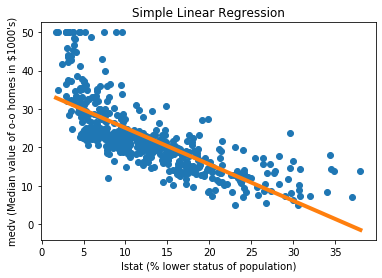

In [68]:
plt.plot(lstat, medv, 'o')
plt.plot(lstat_new, model.predict(lstat_new[:,np.newaxis]), linewidth = 4)
plt.title("Simple Linear Regression")
plt.xlabel("lstat (% lower status of population)")
plt.ylabel("medv (Median value of o-o homes in $1000's)")
plt.show()

## Multiple Linear Regression

Calculating multiple linear regression is just as easy as calculating for a single variable.  In this case we will regress on all variables in the dataframe, save the target variable itself.  We therefore drop the target column from the dataframe when we enter it into model.fit().

In [77]:
model.fit(df.drop('medv', axis = 1), medv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Here I use a simple for loop to print out all the variable names and their corresponding coefficients, along with the intercept.

In [80]:
i = 0
for coef in model.coef_[0]:
    print(df.drop('medv', axis = 1).columns[i] +": " + str(round(coef,3)))
    i +=1
    
print("intercept: " + str(round(model.intercept_[0],2)))

crim: -0.108
zn: 0.046
indus: 0.021
chas: 2.687
nox: -17.767
rm: 3.81
age: 0.001
dis: -1.476
rad: 0.306
tax: -0.012
ptratio: -0.953
black: 0.009
lstat: -0.525
intercept: 36.46


By including these other variables we have increased the explained variance to 74%.

In [83]:
round(100*model.score(df.drop('medv', axis = 1), medv),1)

74.1

## Inclusion of interaction terms

Including an interaction term is as easy as creating the term in the original dataframe and then passing that new variable to model.fit().

In [84]:
df['lstat_x_age'] = df.lstat * df.age
model.fit(df[['lstat', 'age', 'lstat_x_age']], medv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
i = 0
for coef in model.coef_[0]:
    print(['lstat', 'age', 'lstat_x_age'][i] +": " + str(round(coef,4)))
    i +=1
    
print("intercept: " + str(round(model.intercept_[0],4))) 

lstat: -1.3921
age: -0.0007
lstat_x_age: 0.0042
intercept: 36.0885


In [86]:
model.score(df[['lstat', 'age', 'lstat_x_age']], medv)

0.5557265450993936

## Non-Linear Transformations of the Predictors

LinearRegression() also allows for non-linear transformations of the input parameters.  The process is similar to creating an interaction term, except in this case the new parameter will be a function of only one parameter.

In [88]:
df['lstat_sq'] = df['lstat']**2

In [89]:
model.fit(df[['lstat', 'lstat_sq']], medv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
i = 0
for coef in model.coef_[0]:
    print(['lstat', 'lstat_sq'][i] +": " + str(round(coef,4)))
    i +=1
    
print("intercept: " + str(round(model.intercept_[0],4))) 

lstat: -2.3328
lstat_sq: 0.0435
intercept: 42.862


In [92]:
model.score(df[['lstat', 'lstat_sq']], medv)

0.6407168971636612

By including the non-linear term lstat^2 we have increased the ratio of explained variance from 54.4% in the first example, to over 64% in this example.

## Conclusion

## Bibliography

[1] Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

[2] StatLib---Datasets Archive http://lib.stat.cmu.edu/datasets/
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.